In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Data Collection
We import the data into a dataframe called customers.

In [2]:
# Try different encodings
encodings = ['utf-8', 'ISO-8859-1', 'cp1252', 'utf-16', 'utf-32']

for encoding in encodings:
    try:
        customers = pd.read_csv("etihad_bank_data.csv", engine="python", encoding=encoding)
        # If the reading is successful, break the loop
        break
    except UnicodeDecodeError:
        continue


We preview the data to make sure that the input worked as expected

In [3]:
customers.head()

,ID,UNIQUE_CUSTOMER_ID,DOB,GENDER,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,...,HAS_INTERNATIONAL_TRANSFER,TOTAL_LOAN_PAYMENT,TOTAL_LOAN_AMOUNT,LOAN_PERIOD,DPD,TRANSACTION_DATE,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE
0,1,8231,7/28/1994,Female,Zarqa,JO,1.0,Married,JO,Full Time,...,0,218.57,8800.0,4.0,1.0,11/2/2022,9.00,Mens and Womens Clothing Stores,POS,Debit Card
1,2,8231,7/28/1994,Female,Zarqa,JO,1.0,Married,JO,Full Time,...,0,218.57,8800.0,4.0,1.0,11/2/2022,8.99,Mens and Womens Clothing Stores,POS,Debit Card
2,3,8231,7/28/1994,Female,Zarqa,JO,1.0,Married,JO,Full Time,...,0,218.57,8800.0,4.0,1.0,11/2/2022,22.90,Family Clothing Stores,POS,Debit Card
3,4,8231,7/28/1994,Female,Zarqa,JO,1.0,Married,JO,Full Time,...,0,218.57,8800.0,4.0,1.0,3/7/2023,5.00,NaN,NaN,Debit Cheques
4,5,8231,7/28/1994,Female,Zarqa,JO,1.0,Married,JO,Full Time,...,0,218.57,8800.0,4.0,1.0,3/7/2023,8800.00,NaN,NaN,Debit Cheques


In [4]:
customers.shape

(1048575, 38)

# 2. Data Understanding
**Getting a summary of Data Structure (Colum Name, Count, DataType)**

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   ID                          1048575 non-null  int64  
 1   UNIQUE_CUSTOMER_ID          1048575 non-null  int64  
 2   DOB                         1048575 non-null  object 
 3   GENDER                      1048575 non-null  object 
 4   CITY                        1047823 non-null  object 
 5   COUNTRY                     1047823 non-null  object 
 6   IS_RESIDENT                 1033886 non-null  float64
 7   MARITAL_STATUS              1046933 non-null  object 
 8   NATIONALITY                 1048575 non-null  object 
 9   WORK_TYPE                   1048193 non-null  object 
 10  BUSINESS_LINE               913869 non-null   object 
 11  POSITION_TITLE              894085 non-null   object 
 12  SOURCE_OF_INCOME            955433 non-null   object 
 1

**Getting a summary statistics for all columns (Descriptive Statistics)**.
*   **For the non-numeric column:**
> Number of unique values, Top occurring value, and Frequency of the top occurring value

*   **For the numeric column:**
> Mean, Standard deviation, Minimum,  Quartile values, and Maximum

In [6]:
customers.describe(include="all").round(2)

,ID,UNIQUE_CUSTOMER_ID,DOB,GENDER,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,...,HAS_INTERNATIONAL_TRANSFER,TOTAL_LOAN_PAYMENT,TOTAL_LOAN_AMOUNT,LOAN_PERIOD,DPD,TRANSACTION_DATE,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE
count,1048575.00,1048575.00,1048575,1048575,1047823,1047823,1033886.00,1046933,1048575,1048193,...,1048575.00,607889.00,629017.00,629941.00,1046515.00,1048575,1048575.00,548509,622563,1047835
unique,NaN,NaN,7166,2,96,29,NaN,4,43,17,...,NaN,NaN,NaN,NaN,NaN,538,NaN,364,4,11
top,NaN,NaN,12/20/1977,Male,Amman,JO,NaN,Married,JO,Full Time,...,NaN,NaN,NaN,NaN,NaN,5/1/2023,NaN,Grocery Stores and Supermarkets,POS,Debit Card
freq,NaN,NaN,4727,773932,770309,1018969,NaN,680569,945757,667376,...,NaN,NaN,NaN,NaN,NaN,8109,NaN,67655,478923,392680
mean,566676.60,5678734.81,NaN,NaN,NaN,NaN,0.99,NaN,NaN,NaN,...,0.09,486.35,32155.75,8.32,1.63,NaN,660.88,NaN,NaN,NaN
std,336037.61,2383743.57,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,...,0.29,745.58,53747.79,4.81,13.84,NaN,14653.58,NaN,NaN,NaN
min,1.00,1.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,0.00,440.00,1.00,0.00,NaN,-52700.00,NaN,NaN,NaN
25%,262144.50,5027500.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,...,0.00,237.41,13000.00,5.00,0.00,NaN,7.22,NaN,NaN,NaN
50%,600871.00,6098947.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,...,0.00,313.78,18450.00,7.00,0.00,NaN,20.90,NaN,NaN,NaN
75%,863014.50,7697526.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,...,0.00,497.28,28500.00,10.00,0.00,NaN,100.00,NaN,NaN,NaN


**Exploratory Data Analysis (EDA)**

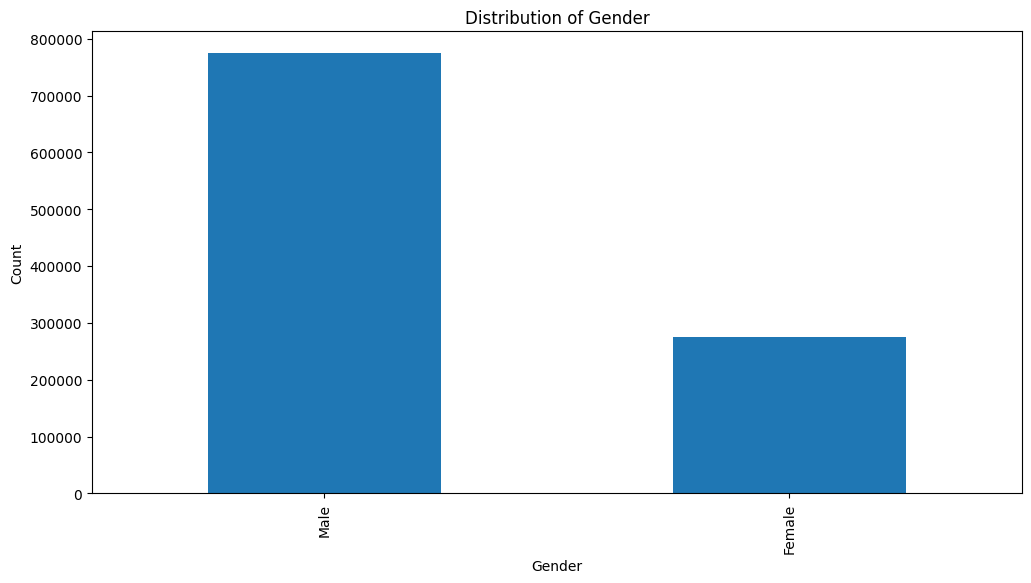

In [7]:
# Plot the distribution of 'GENDER'
plt.figure(figsize=(12, 6))
customers['GENDER'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

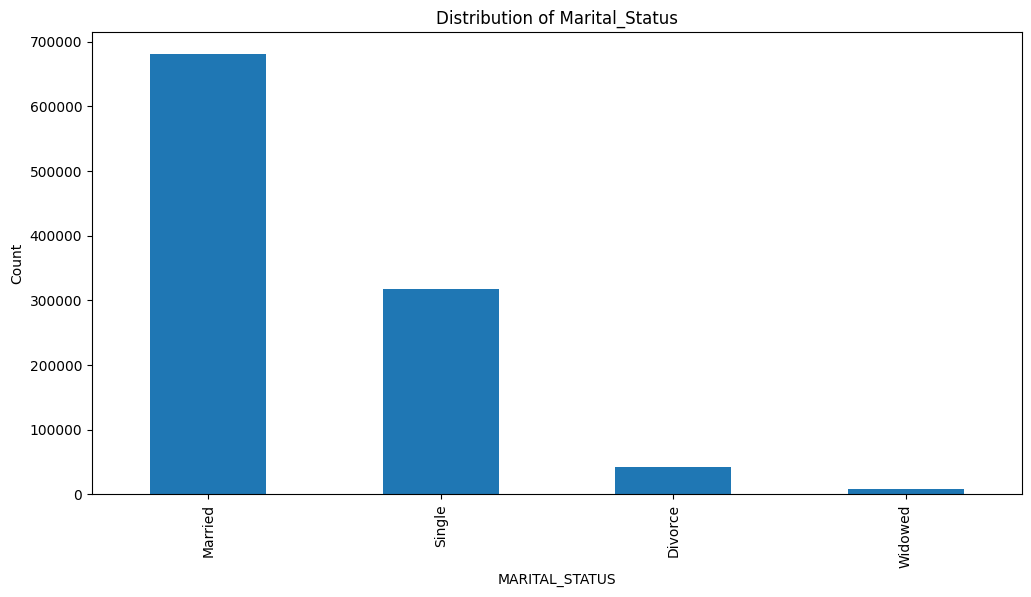

In [8]:
# Plot the distribution of 'MARITAL_STATUS'
plt.figure(figsize=(12, 6))
customers['MARITAL_STATUS'].value_counts().plot(kind='bar')
plt.title('Distribution of Marital_Status')
plt.xlabel('MARITAL_STATUS')
plt.ylabel('Count')
plt.show()

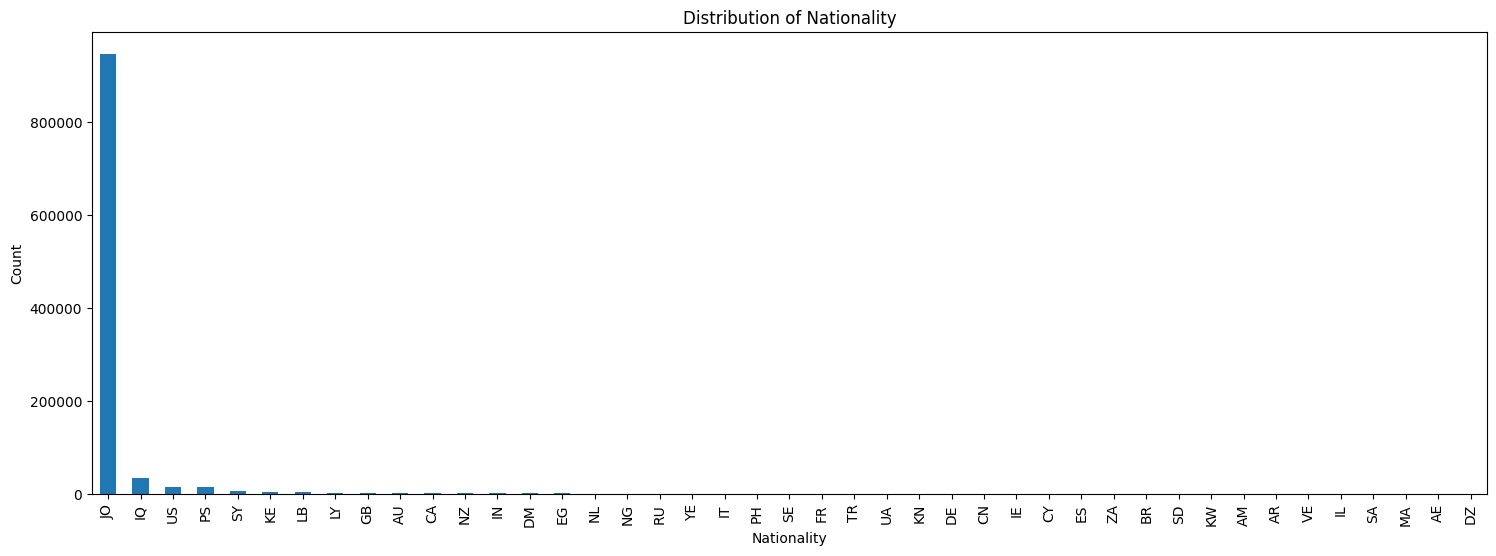

In [9]:
# Plot the distribution of 'NATIONALITY'
plt.figure(figsize=(18, 6))
customers['NATIONALITY'].value_counts().plot(kind='bar')
plt.title('Distribution of Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

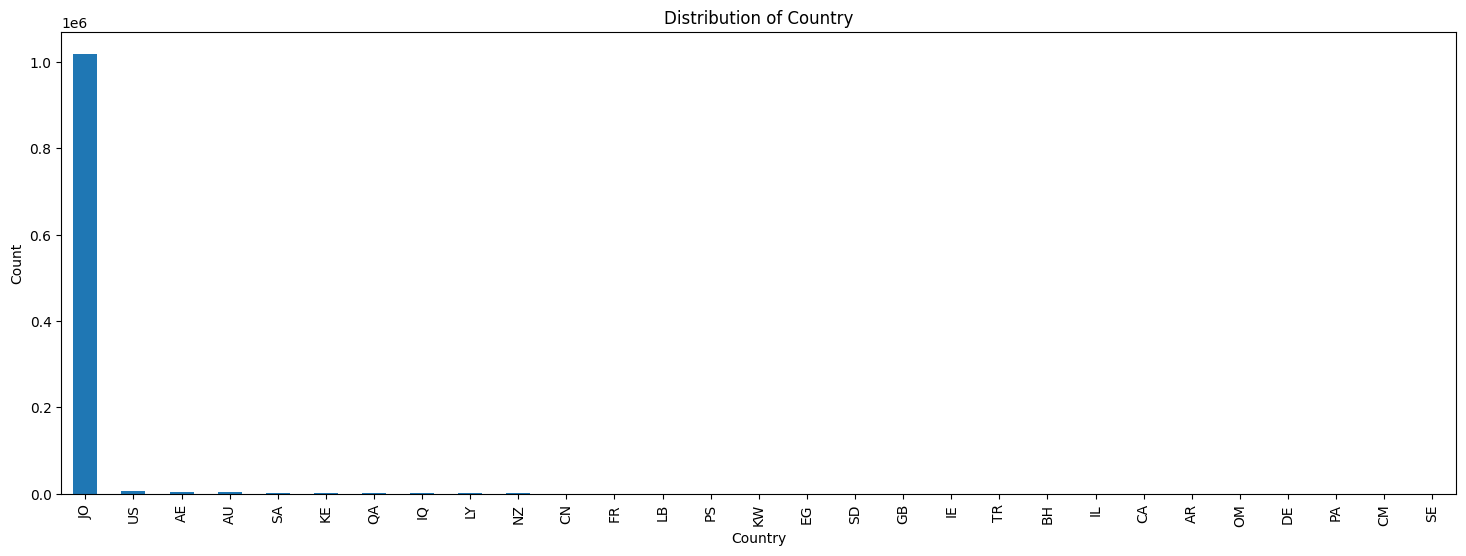

In [10]:
# Plot the distribution of 'COUNTRY'
plt.figure(figsize=(18, 6))
customers['COUNTRY'].value_counts().plot(kind='bar')
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

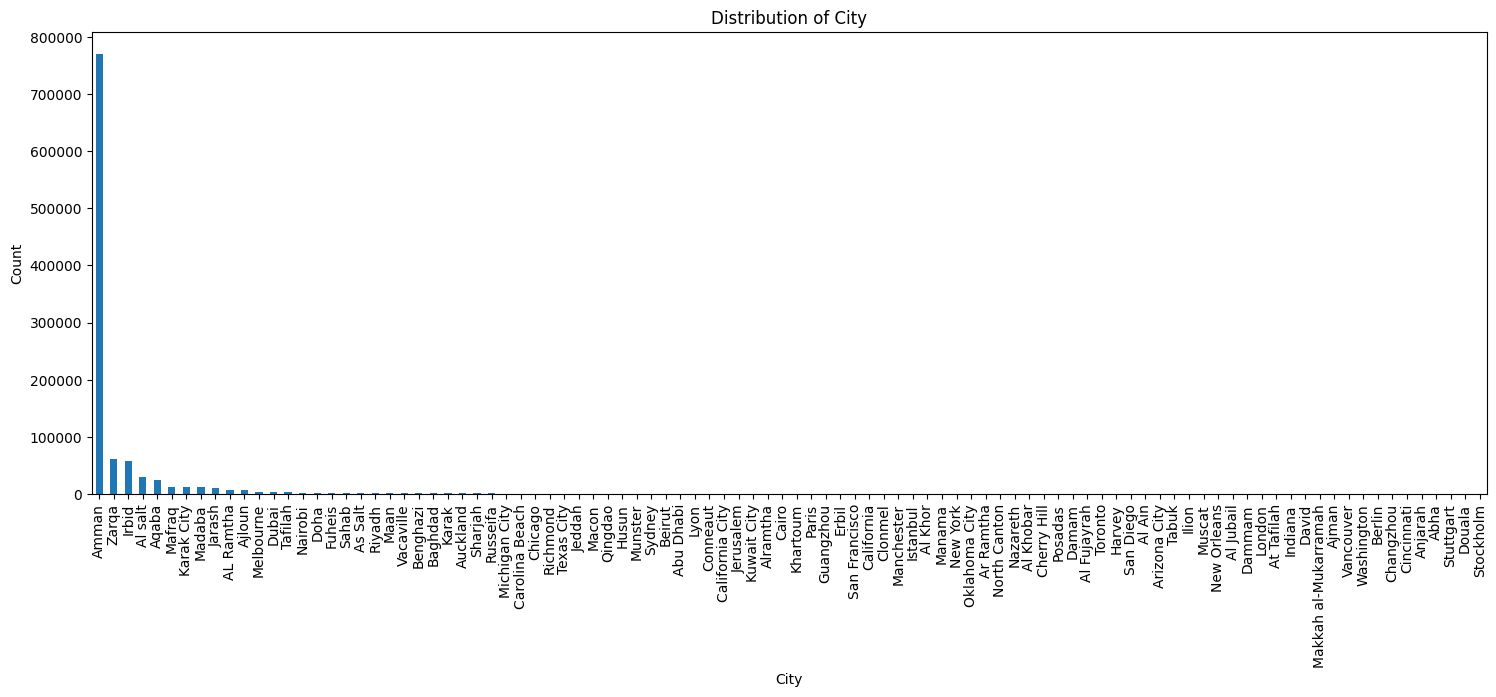

In [11]:
# Plot the distribution of 'CITY'
plt.figure(figsize=(18, 6))
customers['CITY'].value_counts().plot(kind='bar')
plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

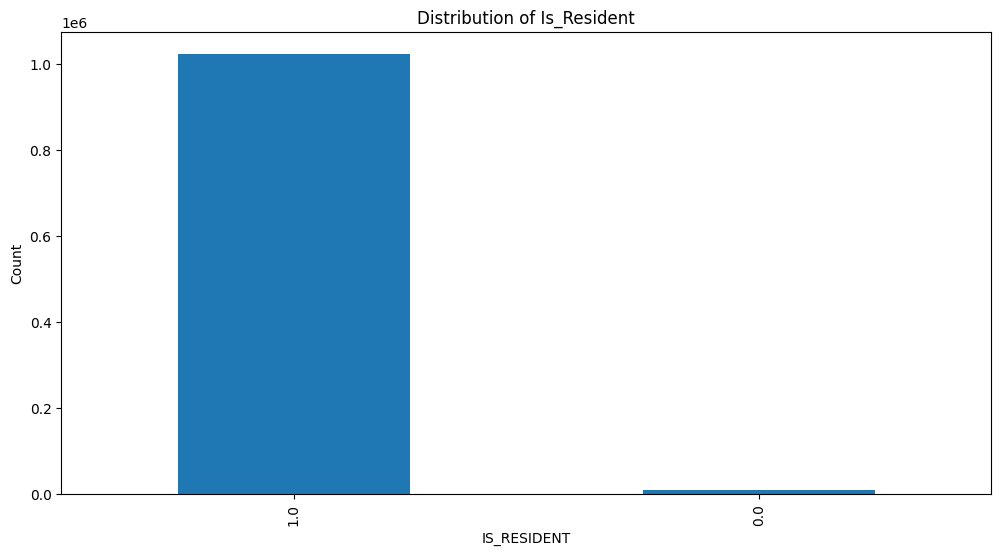

In [12]:
# Plot the distribution of 'IS_RESIDENT'
plt.figure(figsize=(12, 6))
customers['IS_RESIDENT'].value_counts().plot(kind='bar')
plt.title('Distribution of Is_Resident')
plt.xlabel('IS_RESIDENT')
plt.ylabel('Count')
plt.show()

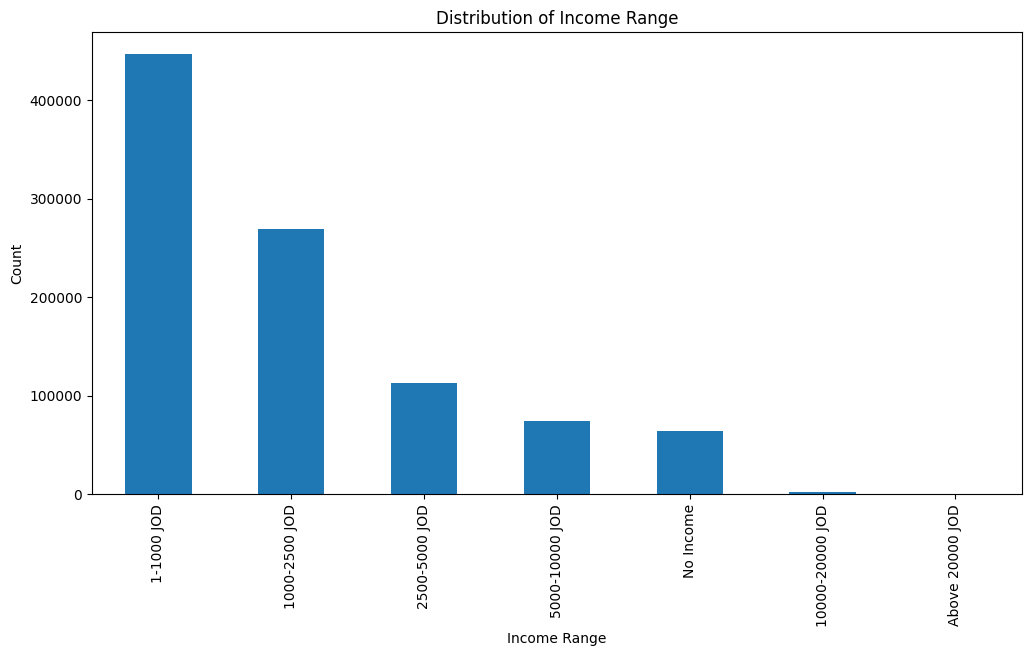

In [13]:
# Plot the distribution of 'Income Range'
plt.figure(figsize=(12, 6))
customers['MONTHLY_INCOME'].value_counts().plot(kind='bar')
plt.title('Distribution of Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.show()

In [14]:
customers['MONTHLY_INCOME'].value_counts()

1-1000 JOD         446670
1000-2500 JOD      269443
2500-5000 JOD      113217
5000-10000 JOD      74696
No Income           64329
10000-20000 JOD      1781
Above 20000 JOD       539
Name: MONTHLY_INCOME, dtype: int64

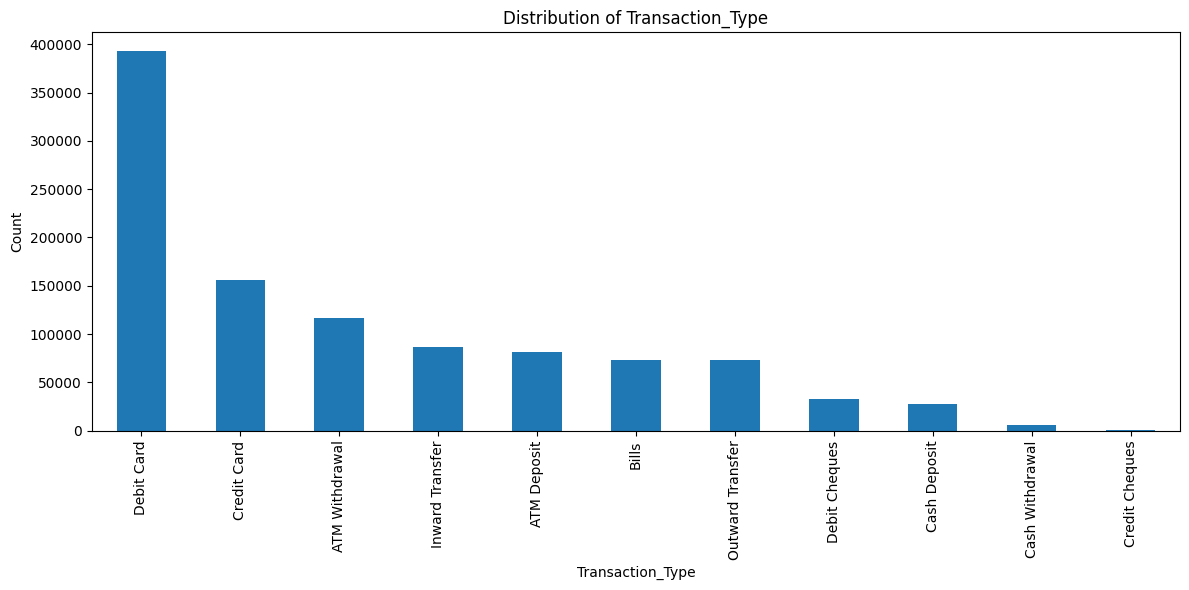

In [15]:
# Plot the distribution of 'TRANSACTION_TYPE'
plt.figure(figsize=(12, 6))
customers['TRANSACTION_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Transaction_Type')
plt.xlabel('Transaction_Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [16]:
customers['TRANSACTION_TYPE'].value_counts()

Debit Card          392680
Credit Card         156399
ATM Withdrawal      116702
Inward Transfer      86192
ATM Deposit          81929
Bills                73484
Outward Transfer     72683
Debit Cheques        33208
Cash Deposit         27719
Cash Withdrawal       5884
Credit Cheques         955
Name: TRANSACTION_TYPE, dtype: int64

# 3. Data Preparation

**Assess Data Quality**


1.   Missing Values
2.   Incorrect DataType



In [17]:
customers.isna().sum()

ID                                 0
UNIQUE_CUSTOMER_ID                 0
DOB                                0
GENDER                             0
CITY                             752
COUNTRY                          752
IS_RESIDENT                    14689
MARITAL_STATUS                  1642
NATIONALITY                        0
WORK_TYPE                        382
BUSINESS_LINE                 134706
POSITION_TITLE                154490
SOURCE_OF_INCOME               93142
MONTHLY_INCOME                 77900
PEP_FLAG                           0
SUBJECT_TO_FATCA                   0
RISK_RATE                          0
KYC_STATUS                         0
TIER                               0
HOUSING_LOAN                       0
PERSONAL_LOAN                      0
AUTO_LOAN                          0
CREDIT_CARD                        0
HAS_FACILITY                       0
PREPAID_CARD                       0
RECIVES_SALARY                     0
SALARY_AMOUNT                 578632
C

In [18]:
# Missing Data
# To remove rows with any NaN values in the original DataFrame
customers.dropna(subset=["TRANSACTION_TYPE"], axis=0, inplace=True)
customers.dropna(subset=["SALARY_AMOUNT"], axis=0, inplace=True)

In [19]:
customers.isna().sum()

ID                                 0
UNIQUE_CUSTOMER_ID                 0
DOB                                0
GENDER                             0
CITY                             578
COUNTRY                          578
IS_RESIDENT                      898
MARITAL_STATUS                   305
NATIONALITY                        0
WORK_TYPE                          0
BUSINESS_LINE                  29778
POSITION_TITLE                 35992
SOURCE_OF_INCOME               15054
MONTHLY_INCOME                 13683
PEP_FLAG                           0
SUBJECT_TO_FATCA                   0
RISK_RATE                          0
KYC_STATUS                         0
TIER                               0
HOUSING_LOAN                       0
PERSONAL_LOAN                      0
AUTO_LOAN                          0
CREDIT_CARD                        0
HAS_FACILITY                       0
PREPAID_CARD                       0
RECIVES_SALARY                     0
SALARY_AMOUNT                      0
C

Check outliers for Salary **Amount**

<Axes: xlabel='GENDER', ylabel='SALARY_AMOUNT'>

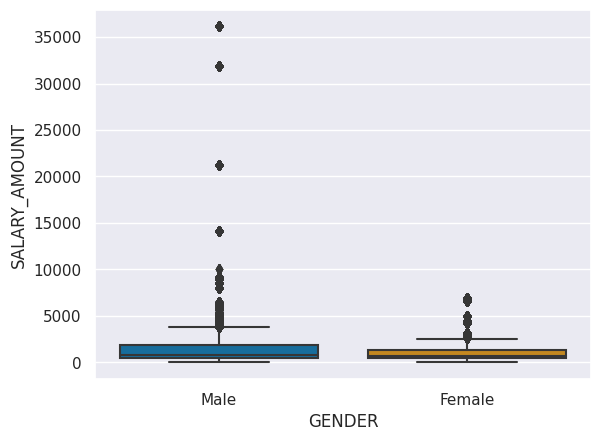

In [20]:
sns.set_theme()
sns.boxplot(data=customers, x="GENDER", y="SALARY_AMOUNT", palette= "colorblind")

In [39]:
count_salary_greater_than_7000_by_customer = customers[customers['SALARY_AMOUNT'] > 7000].groupby('UNIQUE_CUSTOMER_ID').size()
print(count_salary_greater_than_7000_by_customer)

UNIQUE_CUSTOMER_ID
43920      822
1053770    416
3712965    665
3746461    170
3845041      7
4946181    490
5463134    886
6078956    504
6188949    684
8229957    318
dtype: int64


**Selecting customer data that is related to spending behaviour (Debit & Credit Cards transactions)**
**and 10 records of Salary Amount greater than JD7000 to be removed (outliers)**

In [40]:
customers = customers[customers['TRANSACTION_TYPE'].str.contains('|'.join(['Debit Card', 'Credit Card']))]
customers = customers[customers['SALARY_AMOUNT'] < 7000]

In [41]:
customers["TRANSACTION_TYPE"].value_counts()

Debit Card     206165
Credit Card     47469
Name: TRANSACTION_TYPE, dtype: int64

In [42]:
customers.shape

(253634, 38)

**Convert DOB to Age**

In [43]:
# Convert 'DOB' to datetime
customers['DOB'] = pd.to_datetime(customers['DOB'])

# Verify the conversion
print(customers['DOB'].dtype)

datetime64[ns]


In [44]:
# Calculate age based on the 'DOB' column

# Get the current date
current_date = datetime.now()

# Calculate age
customers['Age'] = (current_date - customers['DOB']).astype('<m8[Y]')

customers.head()

,ID,UNIQUE_CUSTOMER_ID,DOB,GENDER,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,...,TOTAL_LOAN_PAYMENT,TOTAL_LOAN_AMOUNT,LOAN_PERIOD,DPD,TRANSACTION_DATE,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age
75,76,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,NaN,0.0,12/23/2022,9.50,Eating Places and Restaurants,POS,Debit Card,20.0
76,77,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,NaN,0.0,10/28/2022,6.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0
77,78,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,NaN,0.0,11/2/2022,3.50,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0
78,79,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,NaN,0.0,11/2/2022,3.75,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0
79,80,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,NaN,0.0,11/7/2022,5.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0


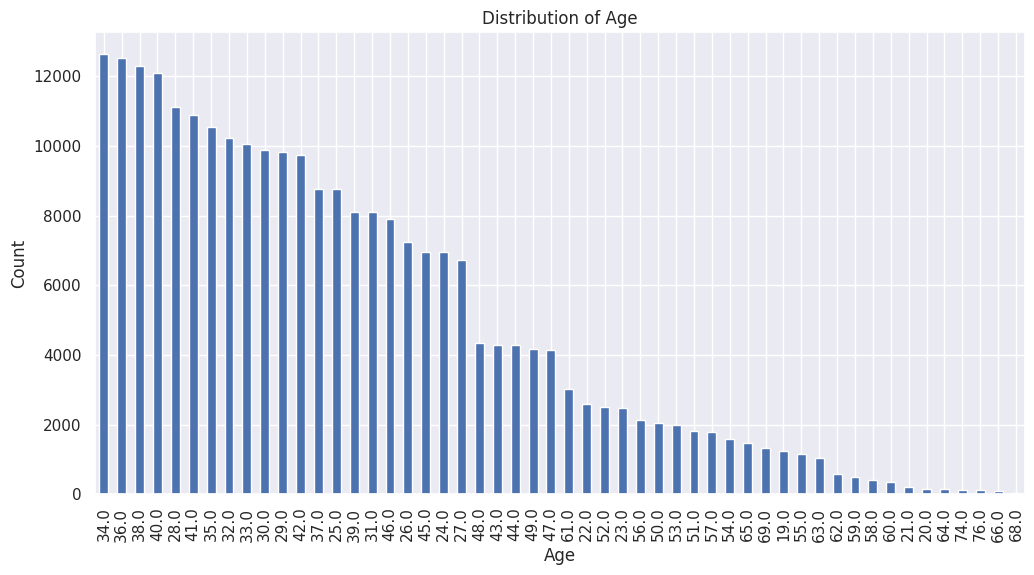

In [45]:
# Plot the distribution of 'Age'
plt.figure(figsize=(12, 6))
customers['Age'].value_counts().plot(kind='bar')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Create Age Grouping (5 Groups)**

In [46]:
bins = np.linspace(min(customers["Age"]), max(customers["Age"]), 6)
bins

array([19. , 30.4, 41.8, 53.2, 64.6, 76. ])

In [47]:
group_age = ['Age: 19-30', 'Age: 30-41', 'Age: 42-53', 'Age: 53-64', 'Age: 64-76']
customers['Age-binned'] = pd.cut(customers['Age'], bins, labels=group_age, include_lowest=True )
customers.head()

,ID,UNIQUE_CUSTOMER_ID,DOB,GENDER,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,...,TOTAL_LOAN_AMOUNT,LOAN_PERIOD,DPD,TRANSACTION_DATE,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned
75,76,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,0.0,12/23/2022,9.50,Eating Places and Restaurants,POS,Debit Card,20.0,Age: 19-30
76,77,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,0.0,10/28/2022,6.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30
77,78,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,0.0,11/2/2022,3.50,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30
78,79,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,0.0,11/2/2022,3.75,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30
79,80,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,NaN,0.0,11/7/2022,5.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30


In [48]:
# Count number of customers by Age Group
customers["Age-binned"].value_counts()

Age: 30-41    116286
Age: 19-30     67221
Age: 42-53     54204
Age: 53-64     12722
Age: 64-76      3201
Name: Age-binned, dtype: int64

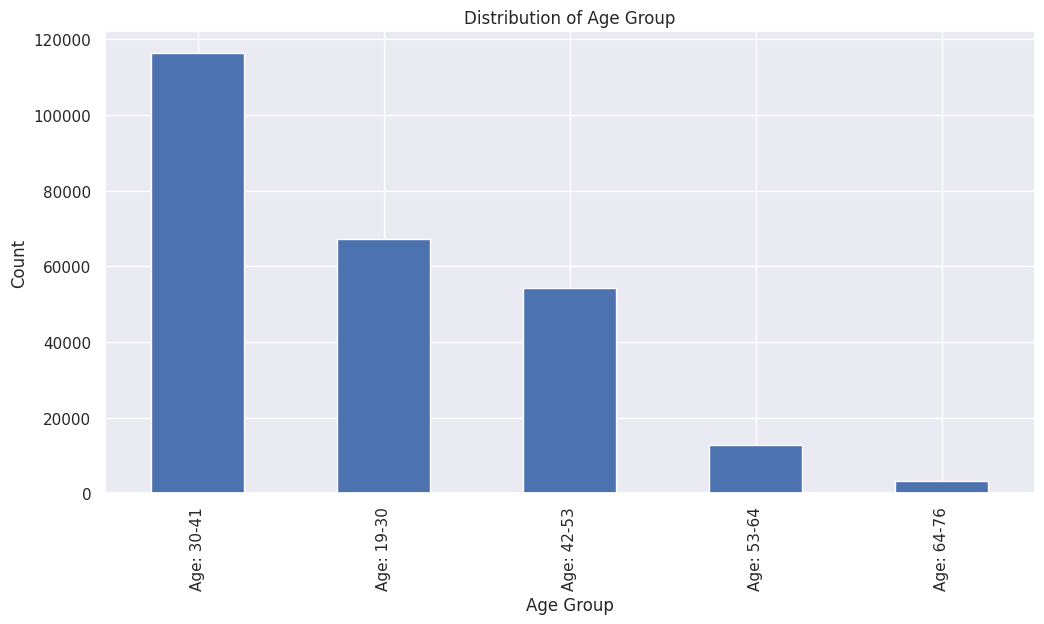

In [49]:
# Plot the distribution of 'Age' Group
plt.figure(figsize=(12, 6))
customers['Age-binned'].value_counts().plot(kind='bar')
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='GENDER', ylabel='Age'>

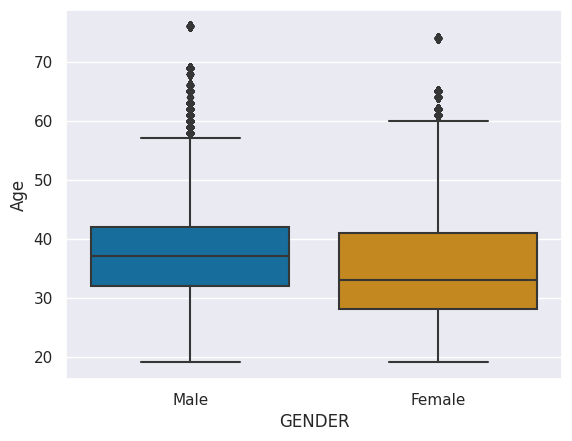

In [50]:
# Boxplot shows how the data is distributed and it also shows any outliers. / The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
sns.set_theme()
sns.boxplot(data=customers, x="GENDER", y="Age", palette= "colorblind")

<Axes: xlabel='GENDER', ylabel='SALARY_AMOUNT'>

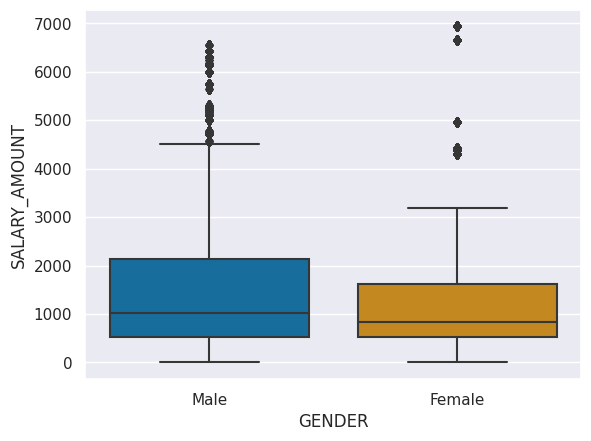

In [51]:
sns.set_theme()
sns.boxplot(data=customers, x="GENDER", y="SALARY_AMOUNT", palette= "colorblind")

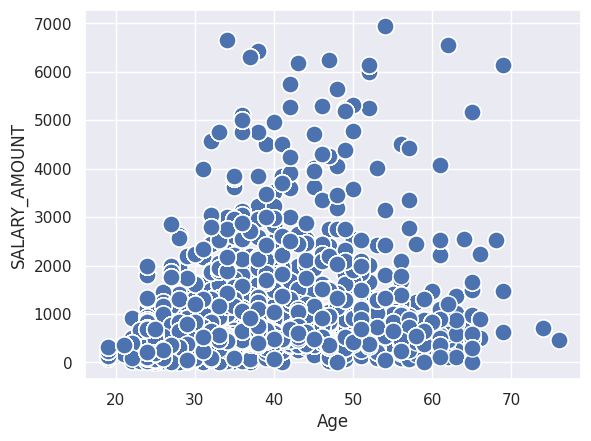

In [52]:
# Scatter plots is used to explore the relationship between two variables (correlation)
ax=sns.scatterplot(data=customers,x="Age",y="SALARY_AMOUNT",s=150)

**Creating New Feature (Total Spending) to be used in Clustering algorithm**

In [53]:
# Step 1: Create a new feature for "Total Spending" that aggregates the transaction amounts for each customer
customers['Total_Spending'] = customers.groupby('UNIQUE_CUSTOMER_ID')['TRANSACTION_AMOUNT'].transform('sum')

In [54]:
customers.head()

,ID,UNIQUE_CUSTOMER_ID,DOB,GENDER,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,...,LOAN_PERIOD,DPD,TRANSACTION_DATE,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned,Total_Spending
75,76,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,0.0,12/23/2022,9.50,Eating Places and Restaurants,POS,Debit Card,20.0,Age: 19-30,537.649
76,77,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,0.0,10/28/2022,6.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30,537.649
77,78,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,0.0,11/2/2022,3.50,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30,537.649
78,79,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,0.0,11/2/2022,3.75,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30,537.649
79,80,8581,2002-12-05,Male,Zarqa,JO,1.0,Single,JO,Student,...,NaN,0.0,11/7/2022,5.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30,537.649


**Check the normalization for the two variables that will be used in clustering**

Check mean and std for:
["SALARY_AMOUNT", "Total_Spending"]


In [55]:
customers[["SALARY_AMOUNT", "Total_Spending"]].describe().round(2)

,SALARY_AMOUNT,Total_Spending
count,253634.00,253634.00
mean,1449.92,18625.06
std,1291.58,31785.38
min,0.00,0.00
25%,528.09,3199.31
50%,958.05,8047.46
75%,1968.20,20432.30
max,6932.06,237127.64


**Z-score normalization**

**Scaling**
k-means clustering uses Euclidean distance to quantify similarity. If we attempt to cluster the data as is, the total spending feature will dominate the distance calculations and salary amount will have little to no impact on the process. To avoid this, we need to normalize or standardize these two features.

In [56]:
# Apply Standard Scaling
scaler_standard = StandardScaler()
customers_scaled = scaler_standard.fit_transform(customers[["SALARY_AMOUNT", "Total_Spending"]])
customers_scaled = pd.DataFrame(customers_scaled, columns = ["SALARY_AMOUNT", "Total_Spending"])

The standardized values should have a standard deviation of one and a mean of zero.

In [57]:
customers_scaled.describe().round(2)

,SALARY_AMOUNT,Total_Spending
count,253634.00,253634.00
mean,0.00,0.00
std,1.00,1.00
min,-1.12,-0.59
25%,-0.71,-0.49
50%,-0.38,-0.33
75%,0.40,0.06
max,4.24,6.87


# Modeling

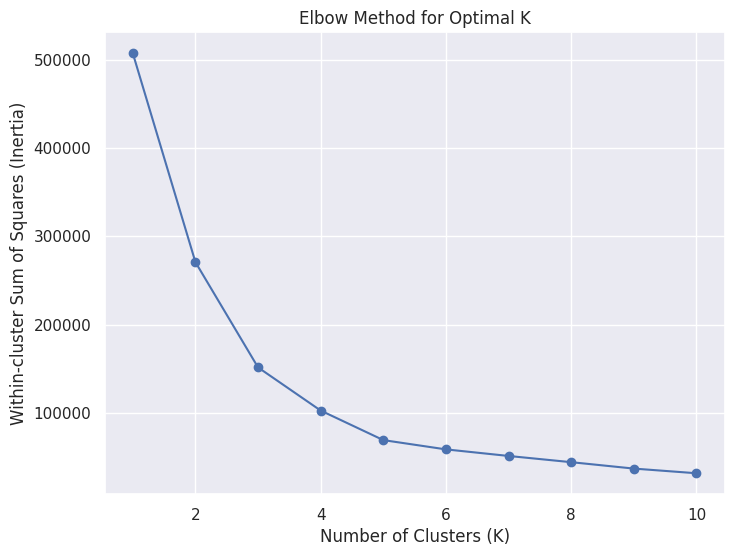

In [58]:
# Features for clustering
features_for_clustering = ["SALARY_AMOUNT", "Total_Spending"]

# Select the data for clustering based on the chosen features
X = customers_scaled[features_for_clustering]

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=25 ,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [59]:
# Choose the optimal number of clusters (K) based on the Elbow Method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=50 ,random_state=42)

**Perform K-means clustering**

In [60]:
# Apply K-means clustering

kmeans.fit(customers_scaled)
# Apply K-means clustering
# kmeans = KMeans(n_clusters=optimal_k, n_init=25, random_state=1234)
# customers['Cluster_Labels'] = kmeans.fit_predict(X)

KMeans(n_clusters=4, n_init=50, random_state=42)

In [61]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

# Evaluation

The inertia_ attribute. This is the total within-cluster sum of squares, WCSS, for the clusters

Another way to evaluate the quality of clusters is to visualize them.

In [62]:
kmeans.inertia_

102707.81616584118

**Cluster Size**

In [63]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    152573
1     30259
2      3685
3     67117
dtype: int64

**Cluster Centers (Cluster Centroids)**

In [64]:
# The cluster_centers attribute of our cluster object provides us with the coordinates of the cluster centers or centroids as a NumPy array.
kmeans.cluster_centers_

array([[-0.60287601, -0.39559173],
       [ 2.1596913 ,  0.6220157 ],
       [ 0.66697957,  6.53777224],
       [ 0.36018717,  0.25989471]])

In [65]:
# convert array to dataframe
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['SALARY_AMOUNT', 'Total_Spending'])
cluster_centers

,SALARY_AMOUNT,Total_Spending
0,-0.602876,-0.395592
1,2.159691,0.622016
2,0.666980,6.537772
3,0.360187,0.259895


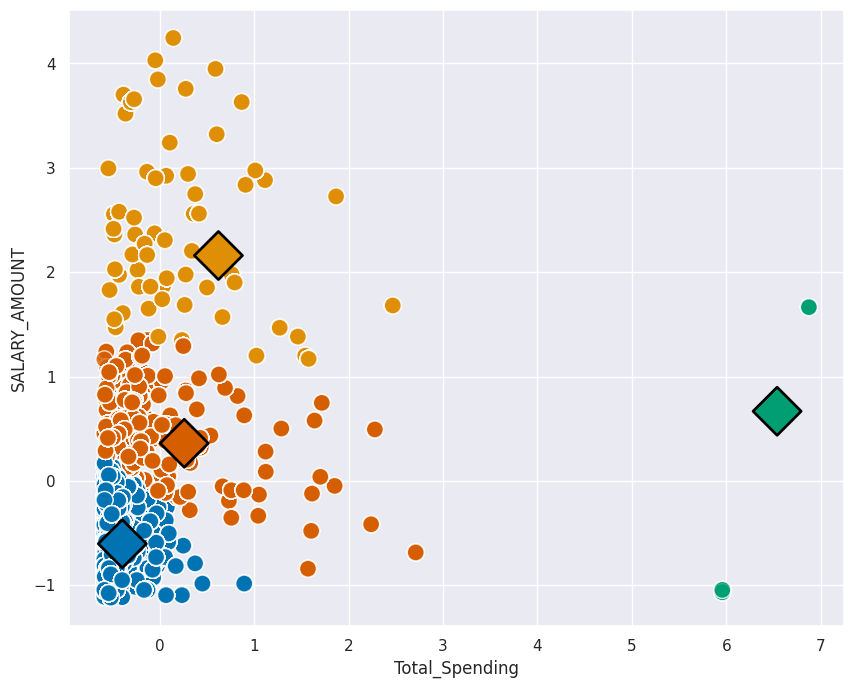

In [66]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(data=customers_scaled[features_for_clustering],x="Total_Spending",y="SALARY_AMOUNT",hue = kmeans.labels_, palette = 'colorblind', alpha = 0.8, s=150, legend = False)
ax=sns.scatterplot(data=cluster_centers,x="Total_Spending",y="SALARY_AMOUNT",hue = cluster_centers.index, palette = 'colorblind', s=600, marker='D', ec= 'black', legend = False)


In [67]:
# Assign clusters to customers
customers['Cluster'] = kmeans.labels_.tolist()

In [68]:
customers.tail()

,ID,UNIQUE_CUSTOMER_ID,DOB,GENDER,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,...,DPD,TRANSACTION_DATE,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned,Total_Spending,Cluster
1047614,1124198,35762,1994-07-12,Male,Amman,JO,1.0,Single,JO,Business Owner,...,0.0,1/13/2022,10.49,"Telecommunication Services, Including Local an...",POS,Debit Card,29.0,Age: 19-30,1444.042,0
1047615,1124199,35762,1994-07-12,Male,Amman,JO,1.0,Single,JO,Business Owner,...,0.0,1/11/2022,5.20,Service Stations (with or without Ancillary Se...,POS,Debit Card,29.0,Age: 19-30,1444.042,0
1047616,1124200,35762,1994-07-12,Male,Amman,JO,1.0,Single,JO,Business Owner,...,0.0,1/13/2022,2.75,Miscellaneous Food Stores-Convenience Stores a...,POS,Debit Card,29.0,Age: 19-30,1444.042,0
1047617,1124201,35762,1994-07-12,Male,Amman,JO,1.0,Single,JO,Business Owner,...,0.0,2/4/2023,5.20,Service Stations (with or without Ancillary Se...,POS,Debit Card,29.0,Age: 19-30,1444.042,0
1047618,1124202,35762,1994-07-12,Male,Amman,JO,1.0,Single,JO,Business Owner,...,0.0,1/20/2023,5.00,Cigar Stores & Stands,POS,Debit Card,29.0,Age: 19-30,1444.042,0


In [69]:
# Convert Gender to numeric variable
customers = pd.get_dummies(customers, columns = ['GENDER'])
customers.head()

,ID,UNIQUE_CUSTOMER_ID,DOB,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,BUSINESS_LINE,...,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned,Total_Spending,Cluster,GENDER_Female,GENDER_Male
75,76,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,9.50,Eating Places and Restaurants,POS,Debit Card,20.0,Age: 19-30,537.649,0,0,1
76,77,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,6.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1
77,78,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,3.50,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1
78,79,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,3.75,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1
79,80,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,5.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1


**Get the mean values for all customers to be compared with cluster values**

In [70]:
customers.agg({
	'GENDER_Male' : 'mean',
	'GENDER_Female' : 'mean',
	'Age' : 'mean',
	'SALARY_AMOUNT' : 'mean',
  'Total_Spending' : 'mean',}).round(2)

GENDER_Male           0.72
GENDER_Female         0.28
Age                  37.25
SALARY_AMOUNT      1449.92
Total_Spending    18625.06
dtype: float64

In [71]:
# Cluster mean values
customers.groupby('Cluster').agg({
	'GENDER_Male' : 'mean',
	'GENDER_Female' : 'mean',
	'Age' : 'mean',
	'SALARY_AMOUNT' : 'mean',
	'Total_Spending' : 'mean'}).round(2)

,GENDER_Male,GENDER_Female,Age,SALARY_AMOUNT,Total_Spending
Cluster,,,,,
0,0.68,0.32,35.03,671.26,6051.05
1,0.85,0.15,42.94,4239.33,38396.02
2,0.63,0.37,38.33,2311.38,226430.20
3,0.74,0.26,39.67,1915.13,26885.90


In [72]:
# Analyze the Clusters - comparing with Customers mean values
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['SALARY_AMOUNT', 'Total_Spending'])
cluster_centers

,SALARY_AMOUNT,Total_Spending
0,-0.602876,-0.395592
1,2.159691,0.622016
2,0.666980,6.537772
3,0.360187,0.259895


In [73]:
# Cluster Volume
pd.Series(kmeans.labels_).value_counts().sort_index()

0    152573
1     30259
2      3685
3     67117
dtype: int64

#  Actionable insights -


***Marketing Campaigns tailored by Age & Gender/ Offereing further Products & Services***


=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=


**Cluster 0 (152573)**
keep a watchful eye on the low earning low spending customers


**Cluster 1 (30259)-85% Male Avg Age 42**
It would make sense to invest in increasing the spending of the high earning in this cluster


**Cluster 2 (3685) 37% Female Avg Age 38**
It would make sense to keep the high spending customers in this cluster too happy

**Cluster 3(67117)**
In terms of a customer relations strategy, it would make sense to invest in increasing the spending in this cluster


In [78]:
# List the customers based on clusters
segment_0_customers = customers[customers['Cluster'] == 0]
segment_1_customers = customers[customers['Cluster'] == 1]
segment_2_customers = customers[customers['Cluster'] == 2]
segment_3_customers = customers[customers['Cluster'] == 3]

In [79]:
segment_0_customers

,ID,UNIQUE_CUSTOMER_ID,DOB,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,BUSINESS_LINE,...,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned,Total_Spending,Cluster,GENDER_Female,GENDER_Male
75,76,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,9.50,Eating Places and Restaurants,POS,Debit Card,20.0,Age: 19-30,537.649,0,0,1
76,77,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,6.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1
77,78,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,3.50,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1
78,79,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,3.75,Quick Payment Service-Fast Food Restaurants,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1
79,80,8581,2002-12-05,Zarqa,JO,1.0,Single,JO,Student,NaN,...,5.20,Service Stations (with or without Ancillary Se...,POS,Credit Card,20.0,Age: 19-30,537.649,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047614,1124198,35762,1994-07-12,Amman,JO,1.0,Single,JO,Business Owner,Engineering Companies,...,10.49,"Telecommunication Services, Including Local an...",POS,Debit Card,29.0,Age: 19-30,1444.042,0,0,1
1047615,1124199,35762,1994-07-12,Amman,JO,1.0,Single,JO,Business Owner,Engineering Companies,...,5.20,Service Stations (with or without Ancillary Se...,POS,Debit Card,29.0,Age: 19-30,1444.042,0,0,1
1047616,1124200,35762,1994-07-12,Amman,JO,1.0,Single,JO,Business Owner,Engineering Companies,...,2.75,Miscellaneous Food Stores-Convenience Stores a...,POS,Debit Card,29.0,Age: 19-30,1444.042,0,0,1
1047617,1124201,35762,1994-07-12,Amman,JO,1.0,Single,JO,Business Owner,Engineering Companies,...,5.20,Service Stations (with or without Ancillary Se...,POS,Debit Card,29.0,Age: 19-30,1444.042,0,0,1


In [80]:
segment_1_customers

,ID,UNIQUE_CUSTOMER_ID,DOB,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,BUSINESS_LINE,...,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned,Total_Spending,Cluster,GENDER_Female,GENDER_Male
2659,2660,66244,1982-05-26,Amman,JO,1.0,Married,JO,Full Time,Engineering Companies,...,8.870,Video Game Arcades and Establishments,POS,Debit Card,41.0,Age: 30-41,34552.174,1,0,1
2660,2661,66244,1982-05-26,Amman,JO,1.0,Married,JO,Full Time,Engineering Companies,...,29.950,Emirates Airlines,E-commerce,Debit Card,41.0,Age: 30-41,34552.174,1,0,1
2661,2662,66244,1982-05-26,Amman,JO,1.0,Married,JO,Full Time,Engineering Companies,...,684.357,"Lodging - Hotels, Motels, and Resorts",POS,Debit Card,41.0,Age: 30-41,34552.174,1,0,1
2662,2663,66244,1982-05-26,Amman,JO,1.0,Married,JO,Full Time,Engineering Companies,...,10.202,Record Stores,POS,Debit Card,41.0,Age: 30-41,34552.174,1,0,1
2663,2664,66244,1982-05-26,Amman,JO,1.0,Married,JO,Full Time,Engineering Companies,...,11.230,Eating Places and Restaurants,POS,Debit Card,41.0,Age: 30-41,34552.174,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009666,1086250,8722636,1986-12-15,Amman,JO,1.0,Married,JO,Business Owner,Medical services,...,11.220,Business Services,POS,Debit Card,36.0,Age: 30-41,30579.934,1,0,1
1009667,1086251,8722636,1986-12-15,Amman,JO,1.0,Married,JO,Business Owner,Medical services,...,5.200,Drug Stores and Pharmacies,POS,Debit Card,36.0,Age: 30-41,30579.934,1,0,1
1009668,1086252,8722636,1986-12-15,Amman,JO,1.0,Married,JO,Business Owner,Medical services,...,8.300,Drug Stores and Pharmacies,POS,Debit Card,36.0,Age: 30-41,30579.934,1,0,1
1009669,1086253,8722636,1986-12-15,Amman,JO,1.0,Married,JO,Business Owner,Medical services,...,3.500,Grocery Stores and Supermarkets,POS,Debit Card,36.0,Age: 30-41,30579.934,1,0,1


In [81]:
segment_2_customers

,ID,UNIQUE_CUSTOMER_ID,DOB,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,BUSINESS_LINE,...,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned,Total_Spending,Cluster,GENDER_Female,GENDER_Male
484721,561305,6092417,1981-02-12,Amman,JO,1.0,Married,JO,Doesnt work,NaN,...,158.000,Family Clothing Stores,POS,Debit Card,42.0,Age: 42-53,237127.637,2,0,1
484722,561306,6092417,1981-02-12,Amman,JO,1.0,Married,JO,Doesnt work,NaN,...,90.000,Miscellaneous Food Stores-Convenience Stores a...,POS,Debit Card,42.0,Age: 42-53,237127.637,2,0,1
484723,561307,6092417,1981-02-12,Amman,JO,1.0,Married,JO,Doesnt work,NaN,...,150.000,Sporting Goods Stores,POS,Debit Card,42.0,Age: 42-53,237127.637,2,0,1
484724,561308,6092417,1981-02-12,Amman,JO,1.0,Married,JO,Doesnt work,NaN,...,20.000,Beauty and Barber Shops,POS,Debit Card,42.0,Age: 42-53,237127.637,2,0,1
484725,561309,6092417,1981-02-12,Amman,JO,1.0,Married,JO,Doesnt work,NaN,...,173.000,"Hobby, Toy and Game Stores",POS,Debit Card,42.0,Age: 42-53,237127.637,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020908,1097492,6250,1991-02-09,Amman,JO,1.0,Single,JO,Full Time,Scientific and Professional Equipment,...,69.291,Womens Ready-to-Wear Stores,E-commerce,Debit Card,32.0,Age: 30-41,207992.331,2,1,0
1020909,1097493,6250,1991-02-09,Amman,JO,1.0,Single,JO,Full Time,Scientific and Professional Equipment,...,62.951,Womens Ready-to-Wear Stores,E-commerce,Debit Card,32.0,Age: 30-41,207992.331,2,1,0
1020910,1097494,6250,1991-02-09,Amman,JO,1.0,Single,JO,Full Time,Scientific and Professional Equipment,...,62.951,Womens Ready-to-Wear Stores,E-commerce,Debit Card,32.0,Age: 30-41,207992.331,2,1,0
1020911,1097495,6250,1991-02-09,Amman,JO,1.0,Single,JO,Full Time,Scientific and Professional Equipment,...,69.291,Womens Ready-to-Wear Stores,E-commerce,Debit Card,32.0,Age: 30-41,207992.331,2,1,0


In [82]:
segment_3_customers

,ID,UNIQUE_CUSTOMER_ID,DOB,CITY,COUNTRY,IS_RESIDENT,MARITAL_STATUS,NATIONALITY,WORK_TYPE,BUSINESS_LINE,...,TRANSACTION_AMOUNT,MERCHANT_CATEGORY,ONLINE_OFFLINE,TRANSACTION_TYPE,Age,Age-binned,Total_Spending,Cluster,GENDER_Female,GENDER_Male
183,184,32983,2000-12-14,Amman,JO,1.0,Single,DM,Full Time,Food and Beverages Trading,...,2.298,Taxicabs and Limousines,Ecommerce,Credit Card,22.0,Age: 19-30,89787.768,3,0,1
184,185,32983,2000-12-14,Amman,JO,1.0,Single,JO,Full Time,Food and Beverages Trading,...,2.298,Taxicabs and Limousines,Ecommerce,Credit Card,22.0,Age: 19-30,89787.768,3,0,1
185,186,32983,2000-12-14,Amman,JO,1.0,Single,DM,Full Time,Food and Beverages Trading,...,42.772,"Digital Goods  Media, Books, Movies, Music",Ecommerce,Credit Card,22.0,Age: 19-30,89787.768,3,0,1
186,187,32983,2000-12-14,Amman,JO,1.0,Single,JO,Full Time,Food and Beverages Trading,...,42.772,"Digital Goods  Media, Books, Movies, Music",Ecommerce,Credit Card,22.0,Age: 19-30,89787.768,3,0,1
187,188,32983,2000-12-14,Amman,JO,1.0,Single,DM,Full Time,Food and Beverages Trading,...,0.000,Quasi Cash - Financial Institution - Merchandi...,POS,Credit Card,22.0,Age: 19-30,89787.768,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045300,1121884,32442,1999-07-19,Irbid,JO,1.0,Single,JO,Full Time,Digital Transformation and E-commerce companies,...,7.870,"Telecommunication Services, Including Local an...",E-commerce,Debit Card,24.0,Age: 19-30,1189.075,3,1,0
1045301,1121885,32442,1999-07-19,Irbid,JO,1.0,Single,JO,Full Time,Digital Transformation and E-commerce companies,...,6.550,"Telecommunication Services, Including Local an...",E-commerce,Debit Card,24.0,Age: 19-30,1189.075,3,1,0
1045302,1121886,32442,1999-07-19,Irbid,JO,1.0,Single,JO,Full Time,Digital Transformation and E-commerce companies,...,9.180,"Telecommunication Services, Including Local an...",E-commerce,Debit Card,24.0,Age: 19-30,1189.075,3,1,0
1045303,1121887,32442,1999-07-19,Irbid,JO,1.0,Single,JO,Full Time,Digital Transformation and E-commerce companies,...,69.360,"Telecommunication Services, Including Local an...",E-commerce,Debit Card,24.0,Age: 19-30,1189.075,3,1,0


# The End